<a href="https://colab.research.google.com/github/myidispg/TFLite_projects/blob/master/tflite_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 26kB/s 
     |████████████████████████████████| 450kB 49.7MB/s 
     |████████████████████████████████| 3.8MB 51.7MB/s 
     |████████████████████████████████| 81kB 12.8MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.6.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalle

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Create a basic model of the form y=mx+c

In [3]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=200, verbose=1)

Train on 6 samples
Epoch 1/200
6/6 [==============================] - 0s 75ms/sample - loss: 31.4938
Epoch 2/200
6/6 [==============================] - 0s 1ms/sample - loss: 25.0972
Epoch 3/200
6/6 [==============================] - 0s 1ms/sample - loss: 20.0581
Epoch 4/200
6/6 [==============================] - 0s 2ms/sample - loss: 16.0871
Epoch 5/200
6/6 [==============================] - 0s 2ms/sample - loss: 12.9567
Epoch 6/200
6/6 [==============================] - 0s 1ms/sample - loss: 10.4877
Epoch 7/200
6/6 [==============================] - 0s 1ms/sample - loss: 8.5391
Epoch 8/200
6/6 [==============================] - 0s 1ms/sample - loss: 7.0002
Epoch 9/200
6/6 [==============================] - 0s 1ms/sample - loss: 5.7836
Epoch 10/200
6/6 [==============================] - 0s 1ms/sample - loss: 4.8208
Epoch 11/200
6/6 [==============================] - 0s 1ms/sample - loss: 4.0577
Epoch 12/200
6/6 [==============================] - 0s 1ms/sample - loss: 3.4520
Epoch 13/20

# Generate a saved model

In [4]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/1/assets


# Convert the SavedModel to TFLite

In [0]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [6]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

780

# Initialize the TFLite Interpreter to try it out

In [9]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(f'Input: {input_details}')
print(f'Output: {output_details}')

Input: [{'name': 'dense_input', 'index': 3, 'shape': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]
Output: [{'name': 'Identity', 'index': 0, 'shape': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [0]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

# Visualize the results

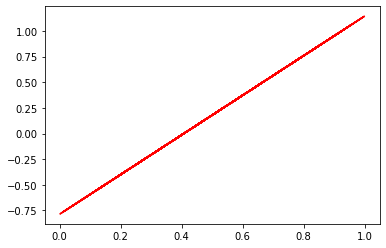

In [11]:
plt.plot(inputs, outputs, 'r')
plt.show()

## Download the TFLite model file

In [0]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass